In [10]:
!git clone https://github.com/enakai00/jupyter_tfbook

Cloning into 'jupyter_tfbook'...
remote: Counting objects: 172, done.
remote: Compressing objects: 100% (70/70), done.
remote: Total 172 (delta 102), reused 172 (delta 102), pack-reused 0
Receiving objects: 100% (172/172), 1.88 MiB | 300.00 KiB/s, done.
Resolving deltas: 100% (102/102), done.
Checking connectivity... done.


In [11]:
!git clone https://github.com/oreilly-japan/deep-learning-from-scratch

Cloning into 'deep-learning-from-scratch'...
remote: Counting objects: 271, done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 271 (delta 14), reused 0 (delta 0), pack-reused 238
Receiving objects: 100% (271/271), 4.69 MiB | 356.00 KiB/s, done.
Resolving deltas: 100% (124/124), done.
Checking connectivity... done.


In [2]:
import numpy as np

In [79]:
X = np.array([5, 0])

In [80]:
print(X)

[5 0]


In [192]:
def h(x):
    if x > 0:
        return 1
    else:
        return 0

In [193]:
h(-1)

0

In [194]:
h(10)

1

In [380]:
W = np.array([1, 2])

In [381]:
b = 16

In [388]:
def output_perceptron(w, x):
    # s = np.sum(w*x)
    s = 0
    for i in range(len(w)):
        s += w[i] * x[i]
    y = h(s - b)
    #print("W:" + str(w) + " X:" + str(x) + " y:" + str(y))
    return y

In [389]:
output_perceptron(W, X)

0

In [384]:
alpha = 1

In [385]:
def train_perceptron(w, x, t):
    y = output_perceptron(w, x)
    square_error = 0
    for i in range(len(w)):
        dw = alpha*(t - y)*h(x[i])
        w[i] += dw
        square_error += np.square(t - y)
        #print("dw:" + str(dw) + " t:" + str(t) + " y:" + str(y) + " xi:" + str(x[i]))
        #print("t:" + str(t) + " y:" + str(y) + " x:" + str(x[i]) + " h(x):" + str(h(x[i])) + " dw:" + str(dw))
    return square_error

In [390]:
train_perceptron(W, X, 1)

2

In [391]:
print(W)

[3 2]


In [217]:
data    = np.array([[5, 0], [0, 4], [1, 1], [3, 4], [2, 3], [1, 3], [2, 1], [0, 2], [2, 2], [3, 0]])
teacher = np.array([ 1,      1,      0,      1,      1,      1,      0,      0,      1,      0    ])

In [218]:
def train():
    for count in range(30):
        i = np.random.randint(10)
        x = data[i]
        t = teacher[i]
        train_perceptron(W, x, t)
        print(W)

In [235]:
W = np.array([1, 3])
b = 16
alpha = 1
train()

W:[1 3] X:[1 1] y:0
t:0 y:0 x:1 h(x):1 dw:0
t:0 y:0 x:1 h(x):1 dw:0
[1 3]
W:[1 3] X:[0 2] y:0
t:0 y:0 x:0 h(x):0 dw:0
t:0 y:0 x:2 h(x):1 dw:0
[1 3]
W:[1 3] X:[5 0] y:0
t:1 y:0 x:5 h(x):1 dw:1
t:1 y:0 x:0 h(x):0 dw:0
[2 3]
W:[2 3] X:[0 2] y:0
t:0 y:0 x:0 h(x):0 dw:0
t:0 y:0 x:2 h(x):1 dw:0
[2 3]
W:[2 3] X:[3 0] y:0
t:0 y:0 x:3 h(x):1 dw:0
t:0 y:0 x:0 h(x):0 dw:0
[2 3]
W:[2 3] X:[2 2] y:0
t:1 y:0 x:2 h(x):1 dw:1
t:1 y:0 x:2 h(x):1 dw:1
[3 4]
W:[3 4] X:[1 1] y:0
t:0 y:0 x:1 h(x):1 dw:0
t:0 y:0 x:1 h(x):1 dw:0
[3 4]
W:[3 4] X:[2 3] y:1
t:1 y:1 x:2 h(x):1 dw:0
t:1 y:1 x:3 h(x):1 dw:0
[3 4]
W:[3 4] X:[1 1] y:0
t:0 y:0 x:1 h(x):1 dw:0
t:0 y:0 x:1 h(x):1 dw:0
[3 4]
W:[3 4] X:[2 3] y:1
t:1 y:1 x:2 h(x):1 dw:0
t:1 y:1 x:3 h(x):1 dw:0
[3 4]
W:[3 4] X:[1 1] y:0
t:0 y:0 x:1 h(x):1 dw:0
t:0 y:0 x:1 h(x):1 dw:0
[3 4]
W:[3 4] X:[2 3] y:1
t:1 y:1 x:2 h(x):1 dw:0
t:1 y:1 x:3 h(x):1 dw:0
[3 4]
W:[3 4] X:[3 0] y:0
t:0 y:0 x:3 h(x):1 dw:0
t:0 y:0 x:0 h(x):0 dw:0
[3 4]
W:[3 4] X:[2 2] y:0
t:1 y:0 x:2 h(x):1

In [237]:
W = np.array([1.0, 3.0])
b = 16
alpha = 0.2
train()

W:[ 1.  3.] X:[2 1] y:0
t:0 y:0 x:2 h(x):1 dw:0.0
t:0 y:0 x:1 h(x):1 dw:0.0
[ 1.  3.]
W:[ 1.  3.] X:[1 1] y:0
t:0 y:0 x:1 h(x):1 dw:0.0
t:0 y:0 x:1 h(x):1 dw:0.0
[ 1.  3.]
W:[ 1.  3.] X:[2 3] y:0
t:1 y:0 x:2 h(x):1 dw:0.2
t:1 y:0 x:3 h(x):1 dw:0.2
[ 1.2  3.2]
W:[ 1.2  3.2] X:[3 4] y:1
t:1 y:1 x:3 h(x):1 dw:0.0
t:1 y:1 x:4 h(x):1 dw:0.0
[ 1.2  3.2]
W:[ 1.2  3.2] X:[2 3] y:0
t:1 y:0 x:2 h(x):1 dw:0.2
t:1 y:0 x:3 h(x):1 dw:0.2
[ 1.4  3.4]
W:[ 1.4  3.4] X:[2 2] y:0
t:1 y:0 x:2 h(x):1 dw:0.2
t:1 y:0 x:2 h(x):1 dw:0.2
[ 1.6  3.6]
W:[ 1.6  3.6] X:[1 3] y:0
t:1 y:0 x:1 h(x):1 dw:0.2
t:1 y:0 x:3 h(x):1 dw:0.2
[ 1.8  3.8]
W:[ 1.8  3.8] X:[0 4] y:0
t:1 y:0 x:0 h(x):0 dw:0.0
t:1 y:0 x:4 h(x):1 dw:0.2
[ 1.8  4. ]
W:[ 1.8  4. ] X:[0 4] y:1
t:1 y:1 x:0 h(x):0 dw:0.0
t:1 y:1 x:4 h(x):1 dw:0.0
[ 1.8  4. ]
W:[ 1.8  4. ] X:[2 3] y:0
t:1 y:0 x:2 h(x):1 dw:0.2
t:1 y:0 x:3 h(x):1 dw:0.2
[ 2.   4.2]
W:[ 2.   4.2] X:[0 2] y:0
t:0 y:0 x:0 h(x):0 dw:0.0
t:0 y:0 x:2 h(x):1 dw:0.0
[ 2.   4.2]
W:[ 2.   4.2] X:[2 3

In [238]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [241]:
images, labels = mnist.train.next_batch(10)

In [249]:
print(images[1])
print(labels[1])

[ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.

In [244]:
import matplotlib.pyplot as plt

3


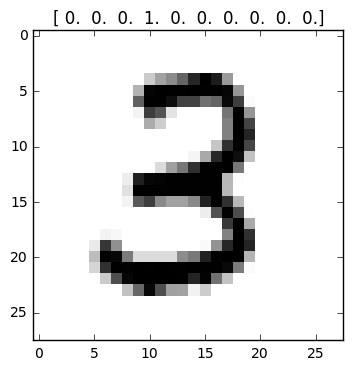

In [266]:
fig = plt.figure(figsize=(8,4))
plt.title(labels[1])
plt.imshow(images[1].reshape((28,28)), vmin=0, vmax=1,
           cmap=plt.cm.gray_r, interpolation="nearest")
print(np.argmax(labels[1]))

In [311]:
def train_layer(neurons, data, teacher):
    square_error = 0
    for i in range(len(neurons)):
        square_error += train_perceptron(neurons[i], data, teacher[i])
    return square_error

In [317]:
def train_mnist():
    images, labels = mnist.train.next_batch(100)
    square_error = 0
    for i in range(len(images)):
        x = images[i]
        t = labels[i]
        square_error += train_layer(neurons, x, t)
    print(square_error)

In [445]:
neurons = np.random.rand(10, 28*28)
b = 0.1
alpha = 0.01
train_mnist()

700896.0


In [446]:
train_mnist()

278320.0


In [447]:
train_mnist()

163072.0


In [448]:
train_mnist()

125440.0


In [449]:
train_mnist()

101136.0


In [450]:
train_mnist()

112112.0


In [451]:
train_mnist()

108192.0


In [452]:
train_mnist()

89376.0


In [453]:
train_mnist()

89376.0


In [429]:
def test_mnist():
    images, labels = mnist.train.next_batch(1)
    x = images[0]
    t = labels[0]
    print(t)
    for i in range(len(neurons)):
        answer = output_perceptron(neurons[i], x)
        print(str(i) + " neuron:" + str(answer))

In [460]:
test_mnist()

[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
0 neuron:0
1 neuron:0
2 neuron:1
3 neuron:0
4 neuron:0
5 neuron:0
6 neuron:0
7 neuron:0
8 neuron:1
9 neuron:0
